In [2]:
# importamos las librerías que necesitamos
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Evaluar linealidad de las relaciones entre las variables
# ------------------------------------------------------------------------------
from scipy.stats import shapiro, kstest
from itertools import combinations
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

## CSV2

In [3]:
# Leer CSV 2
df2 = pd.read_csv("Customer Loyalty History .csv")
df2.head()

,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [4]:
# cambiar nombre columnas
columnas_traducidas2 = {
    'Loyalty Number': 'numero_cliente',
    'Country': 'pais',
    'Province': 'provincia',
    'City': 'ciudad',
    'Postal Code': 'codigo_postal',
    'Gender': 'genero',
    'Education': 'educacion',
    'Salary': 'salario',
    'Marital Status': 'estado_civil',
    'Loyalty Card': 'tarjeta_lealtad',
    'CLV': 'valoracion_cliente',
    'Enrollment Type': 'tipo_inscripcion',
    'Enrollment Year': 'ano_inscripcion',
    'Enrollment Month': 'mes_inscripcion',
    'Cancellation Year': 'ano_cancelacion',
    'Cancellation Month': 'mes_cancelacion'
}
df2.rename(columns= columnas_traducidas2, inplace=True)
df2.head()

,numero_cliente,pais,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,ano_inscripcion,mes_inscripcion,ano_cancelacion,mes_cancelacion
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [5]:
print(f"El número de filas que tenemos es {df2.shape[0]}, y el número de columnas es {df2.shape[1]}")

El número de filas que tenemos es 16737, y el número de columnas es 16


In [6]:
# Informacion del df
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   numero_cliente      16737 non-null  int64  
 1   pais                16737 non-null  object 
 2   provincia           16737 non-null  object 
 3   ciudad              16737 non-null  object 
 4   codigo_postal       16737 non-null  object 
 5   genero              16737 non-null  object 
 6   educacion           16737 non-null  object 
 7   salario             12499 non-null  float64
 8   estado_civil        16737 non-null  object 
 9   tarjeta_lealtad     16737 non-null  object 
 10  valoracion_cliente  16737 non-null  float64
 11  tipo_inscripcion    16737 non-null  object 
 12  ano_inscripcion     16737 non-null  int64  
 13  mes_inscripcion     16737 non-null  int64  
 14  ano_cancelacion     2067 non-null   float64
 15  mes_cancelacion     2067 non-null   float64
dtypes: f

En este caso tenemos variables de los dos tipos, tenemos columnas de tipo numerico (numero_cliente, salario, valoracion_cliente, ano_inscripcion, mes_inscripcion, ano_cancelacion, mes_cancelacion) y las demás son categoricas.

In [7]:
#Sumamos los nulos por columnas
df2.isnull().sum()

numero_cliente            0
pais                      0
provincia                 0
ciudad                    0
codigo_postal             0
genero                    0
educacion                 0
salario                4238
estado_civil              0
tarjeta_lealtad           0
valoracion_cliente        0
tipo_inscripcion          0
ano_inscripcion           0
mes_inscripcion           0
ano_cancelacion       14670
mes_cancelacion       14670
dtype: int64

Tenemos valores nulos en Salario y año y mes de cancelacion -- > Valorar que hacer con los nulos de salario. Los nulos de cancelación corresponden a que no han cancelado su inscripcion.

In [8]:
# % nulos
nulos = df2.isnull().sum()/df2.shape[0]*100
# % nulos ordenados de mayor a menor
nulos.sort_values(ascending=False)

mes_cancelacion       87.650117
ano_cancelacion       87.650117
salario               25.321145
numero_cliente         0.000000
ciudad                 0.000000
codigo_postal          0.000000
provincia              0.000000
pais                   0.000000
educacion              0.000000
genero                 0.000000
estado_civil           0.000000
tarjeta_lealtad        0.000000
tipo_inscripcion       0.000000
valoracion_cliente     0.000000
mes_inscripcion        0.000000
ano_inscripcion        0.000000
dtype: float64

un alto porcentaje de clientes no ha cancelado su subcripcion

In [9]:
# Estadistico de las variables numericas
df2.describe(). T

,count,mean,std,min,25%,50%,75%,max
numero_cliente,16737.0,549735.880445,258912.132453,100018.00,326603.00,550434.00,772019.00,999986.00
salario,12499.0,79245.609409,35008.297285,-58486.00,59246.50,73455.00,88517.50,407228.00
valoracion_cliente,16737.0,7988.896536,6860.982280,1898.01,3980.84,5780.18,8940.58,83325.38
ano_inscripcion,16737.0,2015.253211,1.979111,2012.00,2014.00,2015.00,2017.00,2018.00
mes_inscripcion,16737.0,6.669116,3.398958,1.00,4.00,7.00,10.00,12.00
ano_cancelacion,2067.0,2016.503145,1.380743,2013.00,2016.00,2017.00,2018.00,2018.00
mes_cancelacion,2067.0,6.962748,3.455297,1.00,4.00,7.00,10.00,12.00


Vemos valores negativos en salario --> analizar para ver que hacer con ellos

Fechas inscripcion desde enero del 2012 a diciembre del 2018

Fecha cancelacion desde enero del 2013 a diciembre del 2018

In [10]:
# Estadistico de las categoricas
df2.describe(include="object")

,pais,provincia,ciudad,codigo_postal,genero,educacion,estado_civil,tarjeta_lealtad,tipo_inscripcion
count,16737,16737,16737,16737,16737,16737,16737,16737,16737
unique,1,11,29,55,2,5,3,3,2
top,Canada,Ontario,Toronto,V6E 3D9,Female,Bachelor,Married,Star,Standard
freq,16737,5404,3351,911,8410,10475,9735,7637,15766


In [11]:
# Hacemos un bucle para contar los valores unicos por columna categorica
for i in df2.describe(include="object").iloc[:,4:].columns:
    print(f"{i.upper()}\n{df2[i].value_counts()}\n")
    print("----------------------------------------------")

GENERO
genero
Female    8410
Male      8327
Name: count, dtype: int64

----------------------------------------------
EDUCACION
educacion
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

----------------------------------------------
ESTADO_CIVIL
estado_civil
Married     9735
Single      4484
Divorced    2518
Name: count, dtype: int64

----------------------------------------------
TARJETA_LEALTAD
tarjeta_lealtad
Star      7637
Nova      5671
Aurora    3429
Name: count, dtype: int64

----------------------------------------------
TIPO_INSCRIPCION
tipo_inscripcion
Standard          15766
2018 Promotion      971
Name: count, dtype: int64

----------------------------------------------


In [12]:
# sumamos las filas duplicadas
df2.duplicated().sum()

np.int64(0)

No hay filas dupliacadas

In [13]:
# Comprobar duplicados en numero de cliente
df2["numero_cliente"].duplicated().sum()


np.int64(0)

Como consideramos los NaN de la columna de año y mes como que no se han dado de baja, vamos a generar una columna que diga si el cliente esta activo o no y luego sustituirlos por 999 en el caso del año y 99 en el caso de los meses. Tambien cambiamos el tipo de dato a int al sustituir los NaN.

In [14]:
# vamos a generar una columa que indique si el cliente esta activo
df2["estado_cliente"] = df2["mes_cancelacion"].apply(lambda x: "Activo" if pd.isnull(x) else 'Cancelado')
df2["estado_cliente"]

0           Activo
1           Activo
2        Cancelado
3           Activo
4           Activo
           ...    
16732       Activo
16733       Activo
16734       Activo
16735       Activo
16736    Cancelado
Name: estado_cliente, Length: 16737, dtype: object

In [15]:
# sustituimos los NaN de años 999  Comprobamos
print(f"El numero de nulos en año de cancelacion antes de convertirlos es {df2['ano_cancelacion'].isnull().sum()}")
df2["ano_cancelacion"] = df2["ano_cancelacion"].fillna(999).astype(int)
print(f"El numero de nulos en año de cancelacion después de convertirlos es {df2['ano_cancelacion'].isnull().sum()}")

El numero de nulos en año de cancelacion antes de convertirlos es 14670
El numero de nulos en año de cancelacion después de convertirlos es 0


In [16]:
# sustituimos los nan de mes a 12  Comprobamos
print(f"El numero de nulos mes de cancelacion antes de convertirlos es {df2['mes_cancelacion'].isnull().sum()}")
df2["mes_cancelacion"] = df2["mes_cancelacion"].fillna(99).astype(int)
print(f"El numero de nulos mes de cancelacion después de convertirlos es {df2['mes_cancelacion'].isnull().sum()}")

El numero de nulos mes de cancelacion antes de convertirlos es 14670
El numero de nulos mes de cancelacion después de convertirlos es 0


Comprobamos y ahora no tenemos nulos en esas dos columnas.

Ahora vamos a investigar los salarios:

In [17]:
# numero de valores negativos
df2[df2["salario"]<0].shape

(20, 17)

In [18]:
df2[df2["salario"]<0].head(10)

,numero_cliente,pais,provincia,ciudad,codigo_postal,genero,educacion,salario,estado_civil,tarjeta_lealtad,valoracion_cliente,tipo_inscripcion,ano_inscripcion,mes_inscripcion,ano_cancelacion,mes_cancelacion,estado_cliente
1082,542976,Canada,Quebec,Montreal,H2Y 4R4,Male,High School or Below,-49830.0,Divorced,Star,24127.50,2018 Promotion,2018,3,999,99,Activo
1894,959977,Canada,British Columbia,Vancouver,V5R 1W3,Female,Bachelor,-12497.0,Married,Aurora,9453.00,2018 Promotion,2018,3,999,99,Activo
2471,232755,Canada,British Columbia,Vancouver,V1E 4R6,Female,Bachelor,-46683.0,Single,Nova,4787.81,2018 Promotion,2018,3,999,99,Activo
3575,525245,Canada,British Columbia,Victoria,V10 6T5,Male,Bachelor,-45962.0,Married,Star,2402.33,2018 Promotion,2018,3,999,99,Activo
3932,603070,Canada,British Columbia,West Vancouver,V6V 8Z3,Female,Bachelor,-19325.0,Single,Star,2893.74,2018 Promotion,2018,3,999,99,Activo
4712,491242,Canada,British Columbia,Dawson Creek,U5I 4F1,Male,Bachelor,-43234.0,Married,Star,7597.91,2018 Promotion,2018,3,999,99,Activo
6560,115505,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-10605.0,Married,Nova,5860.17,2018 Promotion,2018,4,999,99,Activo
6570,430398,Canada,Newfoundland,St. John's,A1C 6H9,Male,Bachelor,-17534.0,Married,Nova,49423.80,2018 Promotion,2018,3,999,99,Activo
7373,152016,Canada,Ontario,Toronto,P1J 8T7,Female,Bachelor,-58486.0,Married,Aurora,5067.21,2018 Promotion,2018,2,999,99,Activo
8576,194065,Canada,Ontario,Sudbury,M5V 1G5,Female,Bachelor,-31911.0,Married,Nova,2888.85,2018 Promotion,2018,2,999,99,Activo


Tenemos 20 clientes con valores negativos. Vamos a comparar el salario dependiendo de la educacion para ver si podemos sacar alguna conclusión

In [19]:
# vemos la media por grupo para ver si como encajar esos valores negativos
df2.groupby("educacion")["salario"].describe()

,count,mean,std,min,25%,50%,75%,max
educacion,,,,,,,,
Bachelor,10475.0,72451.061575,17207.352107,-58486.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61071.718670,12733.501155,-49830.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


Vemos que la educacion College tiene todo Nan, esto nos hace pensar que todos los que tienen nan en el salario corresponden a ese grupo de educacion.

In [20]:
# filtramos por colllege
grupo_college = df2[df2["educacion"] == "College"]

In [21]:
# vemos su porcentaje de nulos
grupo_college.isnull().sum()/df2.shape[0]*100

numero_cliente         0.000000
pais                   0.000000
provincia              0.000000
ciudad                 0.000000
codigo_postal          0.000000
genero                 0.000000
educacion              0.000000
salario               25.321145
estado_civil           0.000000
tarjeta_lealtad        0.000000
valoracion_cliente     0.000000
tipo_inscripcion       0.000000
ano_inscripcion        0.000000
mes_inscripcion        0.000000
ano_cancelacion        0.000000
mes_cancelacion        0.000000
estado_cliente         0.000000
dtype: float64

Vamos a comprobar que el resto de grupos no tienen Nan

In [22]:
# filtro resto de grupos
resto_grupos = df2[df2["educacion"] != "College"]

In [23]:
# vemos nulos
resto_grupos.isnull().sum()

numero_cliente        0
pais                  0
provincia             0
ciudad                0
codigo_postal         0
genero                0
educacion             0
salario               0
estado_civil          0
tarjeta_lealtad       0
valoracion_cliente    0
tipo_inscripcion      0
ano_inscripcion       0
mes_inscripcion       0
ano_cancelacion       0
mes_cancelacion       0
estado_cliente        0
dtype: int64

Vamos a continuar con la investigación de los valores negativos

In [ ]:
salarios_negativos = df2[df2["salario"]<=0]
salarios_negativos

In [ ]:
salarios_positivos = df2[df2["salario"]>0]
salarios_positivos

In [26]:
salarios_negativos.groupby("educacion")["salario"].describe()

,count,mean,std,min,25%,50%,75%,max
educacion,,,,,,,,
Bachelor,19.0,-34786.052632,16080.943973,-58486.0,-46576.5,-39503.0,-19328.5,-9081.0
High School or Below,1.0,-49830.000000,NaN,-49830.0,-49830.0,-49830.0,-49830.0,-49830.0


In [27]:
salarios_positivos.groupby("educacion")["salario"].describe()

,count,mean,std,min,25%,50%,75%,max
educacion,,,,,,,,
Bachelor,10456.0,72645.926262,16590.634159,15609.0,58715.5,72026.0,85848.0,105563.0
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.0,182143.5,236612.0,407228.0
High School or Below,781.0,61213.718310,12106.260467,21853.0,52209.0,61928.0,71398.0,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.0,105487.0,118530.0,133080.0


In [28]:
# funcion que convierte el valor a positivo
def convertir_positivo(valor):
    if pd.isnull(valor):
        return valor 
    if valor < 0:
        return abs(valor)
    else:
        return valor
df2["salario"] = df2["salario"].apply(convertir_positivo)

In [33]:
def convertir_datos_negativos(valor):
     if valor < 0:
         return 72026.0
     else:
         return valor


In [40]:
df2['educacion'].value_counts()

educacion
Bachelor                10475
College                  4238
High School or Below      782
Doctor                    734
Master                    508
Name: count, dtype: int64

In [34]:
df2["salario"] = df2["salario"].apply(convertir_datos_negativos)
df2.groupby("educacion")["salario"].describe()

,count,mean,std,min,25%,50%,75%,max
educacion,,,,,,,,
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0


Hemos hecho esta función para considerar los valores negativos como errores y tratarlos como Nan, ya que de los 20 valores negativos 19 son del grupo Bachelor, así que les he introducido la media a esos valores pero el resultado en la media y en la mediana no son relevantes

In [35]:
# vemos el salario por educacion de forma ordenada
df2.groupby(["educacion"])["salario"].describe().sort_values(by="mean")

,count,mean,std,min,25%,50%,75%,max
educacion,,,,,,,,
High School or Below,782.0,61199.161125,12105.354128,21853.0,52151.25,61915.0,71384.5,93875.0
Bachelor,10475.0,72577.254415,16667.023853,9081.0,58711.00,71960.0,85808.0,105563.0
Master,508.0,103757.848425,17527.938162,56414.0,88120.00,105487.0,118530.0,133080.0
Doctor,734.0,178608.897820,70466.188750,48109.0,124768.00,182143.5,236612.0,407228.0
College,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# calculamos las medianas y medias de todos los niveles
print(df2["salario"].median())
print(df2["salario"].mean())

73455.0
79359.34090727258


Usaremos esa media y esa mediana para para estimar el salario de los que han estudiado College

In [53]:
college_mediana= df2["salario"].median()
college_media= df2["salario"].mean()

In [54]:
# introducimos la mediana a los valores nan de salario 
df2["salario"].fillna(college_mediana, inplace=True)

In [55]:
# comprobamos valores nulos
df2.isnull().sum()

numero_cliente        0
pais                  0
provincia             0
ciudad                0
codigo_postal         0
genero                0
educacion             0
salario               0
estado_civil          0
tarjeta_lealtad       0
valoracion_cliente    0
tipo_inscripcion      0
ano_inscripcion       0
mes_inscripcion       0
ano_cancelacion       0
mes_cancelacion       0
estado_cliente        0
dtype: int64

In [84]:
df2.groupby(["educacion","provincia"])["salario"].describe().sort_values(by="mean")

count           mean  \
educacion            provincia                                     
High School or Below Prince Edward Island     3.0   44481.666667   
                     Manitoba                36.0   59157.111111   
                     Alberta                 57.0   60647.982456   
                     Ontario                257.0   60861.089494   
                     British Columbia       198.0   61157.616162   
                     Newfoundland            11.0   61542.181818   
                     Quebec                 154.0   61601.759740   
                     Nova Scotia             22.0   63068.818182   
                     Yukon                    3.0   63445.000000   
                     New Brunswick           24.0   64332.541667   
                     Saskatchewan            17.0   64807.941176   
Bachelor             Yukon                   68.0   68814.250000   
                     Newfoundland           161.0   71126.006211   
                     New Brunswick          407.0   71867.641278   
                     Manitoba               407.0   72201.331695   
                     Quebec                2070.0   72351.713527   
                     Alberta                605.0   72518.753719   
                     Ontario               3357.0   72633.381293   
                     British Columbia      2749.0   72828.445253   
                     Nova Scotia            352.0   73102.923295   
                     Saskatchewan           259.0   73205.131274   
College              Yukon                   31.0   73455.000000   
                     Prince Edward Island    19.0   73455.000000   
                     Quebec                 824.0   73455.000000   
                     Saskatchewan           106.0   73455.000000   
                     Ontario               1387.0   73455.000000   
                     British Columbia      1135.0   73455.000000   
                     Alberta                244.0   73455.000000   
                     New Brunswick          146.0   73455.000000   
                     Manitoba               168.0   73455.000000   
                     Newfoundland            67.0   73455.000000   
                     Nova Scotia            111.0   73455.000000   
Bachelor             Prince Edward Island    40.0   77752.600000   
Master               Prince Edward Island     2.0   97444.000000   
                     Newfoundland            12.0  102103.000000   
                     British Columbia       130.0  102675.984615   
                     Nova Scotia             15.0  103219.066667   
                     Ontario                170.0  103589.370588   
                     Quebec                  95.0  103630.273684   
                     Saskatchewan            13.0  104615.923077   
                     Alberta                 32.0  104833.250000   
                     Manitoba                17.0  105283.647059   
                     New Brunswick           20.0  109536.400000   
                     Yukon                    2.0  121204.500000   
Doctor               Saskatchewan            14.0  151863.285714   
                     Manitoba                30.0  157946.933333   
                     Nova Scotia             18.0  160885.333333   
                     Newfoundland             7.0  166762.714286   
                     Alberta                 31.0  167966.645161   
                     Ontario                233.0  177617.879828   
                     British Columbia       197.0  182246.609137   
                     New Brunswick           39.0  182500.512821   
                     Prince Edward Island     2.0  182555.000000   
                     Quebec                 157.0  183902.515924   
                     Yukon                    6.0  220220.500000   

                                                    std       min        25%  \
educacion            provincia                                                 
High Sc

## CORRELACIONES

In [87]:
# sacamos la combinacion de las columnas numericas 
numericas = df2.select_dtypes(include = np.number).columns
combinaciones = list(combinations(numericas, 2))

In [61]:
combinaciones

[('numero_cliente', 'salario'),
 ('numero_cliente', 'valoracion_cliente'),
 ('numero_cliente', 'ano_inscripcion'),
 ('numero_cliente', 'mes_inscripcion'),
 ('numero_cliente', 'ano_cancelacion'),
 ('numero_cliente', 'mes_cancelacion'),
 ('salario', 'valoracion_cliente'),
 ('salario', 'ano_inscripcion'),
 ('salario', 'mes_inscripcion'),
 ('salario', 'ano_cancelacion'),
 ('salario', 'mes_cancelacion'),
 ('valoracion_cliente', 'ano_inscripcion'),
 ('valoracion_cliente', 'mes_inscripcion'),
 ('valoracion_cliente', 'ano_cancelacion'),
 ('valoracion_cliente', 'mes_cancelacion'),
 ('ano_inscripcion', 'mes_inscripcion'),
 ('ano_inscripcion', 'ano_cancelacion'),
 ('ano_inscripcion', 'mes_cancelacion'),
 ('mes_inscripcion', 'ano_cancelacion'),
 ('mes_inscripcion', 'mes_cancelacion'),
 ('ano_cancelacion', 'mes_cancelacion')]

In [88]:
# creamos una función para identificar si las relaciones entre las variables son lienales o no
def identificar_linealidad (dataframe, lista_combinacion_columnas):
    """
    Identifica si las relaciones entre pares de variables en un DataFrame son lineales o no.

    Parameters:
    -----------
    dataframe : pandas.DataFrame
        El DataFrame que contiene las variables a analizar.

    lista_combinacion_columnas : list of tuples
        Una lista de tuplas donde cada tupla contiene dos nombres de columnas del DataFrame que se desea analizar.

    Returns:
    --------
    relaciones_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que tienen una relación lineal.

    relaciones_no_lineales : list of tuples
        Una lista de tuplas que contienen los nombres de las columnas que no tienen una relación lineal.

    """
    relaciones_lineales = []
    relaciones_no_lineales = []

    for tupla in lista_combinacion_columnas: 
        # Realizar la prueba de normalidad
        _, p_value1 = kstest(dataframe[tupla[0]], "norm")
        _, p_value2 = kstest(dataframe[tupla[1]], "norm")

        if p_value1 > 0.05 and p_value2 > 0.05:
            relaciones_lineales.append(tupla)
        else:
            relaciones_no_lineales.append(tupla)

    return relaciones_lineales, relaciones_no_lineales

# llamamos a la funcion

lineal, no_lineal = identificar_linealidad(df2, combinaciones)

print(f"Las variables a las que tengamos que aplicar la correlacion de pearson son: {lineal}")
print(f"Las variables a las que tengamos que aplicar la correlacion de spearman son: {no_lineal}")

Las variables a las que tengamos que aplicar la correlacion de pearson son: []
Las variables a las que tengamos que aplicar la correlacion de spearman son: [('numero_cliente', 'salario'), ('numero_cliente', 'valoracion_cliente'), ('numero_cliente', 'ano_inscripcion'), ('numero_cliente', 'mes_inscripcion'), ('numero_cliente', 'ano_cancelacion'), ('numero_cliente', 'mes_cancelacion'), ('numero_cliente', 'columna_float'), ('salario', 'valoracion_cliente'), ('salario', 'ano_inscripcion'), ('salario', 'mes_inscripcion'), ('salario', 'ano_cancelacion'), ('salario', 'mes_cancelacion'), ('salario', 'columna_float'), ('valoracion_cliente', 'ano_inscripcion'), ('valoracion_cliente', 'mes_inscripcion'), ('valoracion_cliente', 'ano_cancelacion'), ('valoracion_cliente', 'mes_cancelacion'), ('valoracion_cliente', 'columna_float'), ('ano_inscripcion', 'mes_inscripcion'), ('ano_inscripcion', 'ano_cancelacion'), ('ano_inscripcion', 'mes_cancelacion'), ('ano_inscripcion', 'columna_float'), ('mes_inscrip

In [91]:
# Filtrar solo las columnas numéricas 
df2_numerico = df2.select_dtypes(include=['number']) 
# Calcular la correlación de Spearman en las columnas numéricas
df_correlaciones = df2_numerico.corr(method='spearman')
 # Verificar el resultado 
print(df_correlaciones)

                    numero_cliente   salario  valoracion_cliente  \
numero_cliente            1.000000  0.001428           -0.007670   
salario                   0.001428  1.000000           -0.010883   
valoracion_cliente       -0.007670 -0.010883            1.000000   
ano_inscripcion           0.009051 -0.038142           -0.002707   
mes_inscripcion           0.004146  0.030957            0.010266   
ano_cancelacion           0.001728 -0.000548            0.004136   
mes_cancelacion          -0.000662 -0.000089           -0.005408   
columna_float                  NaN       NaN                 NaN   

                    ano_inscripcion  mes_inscripcion  ano_cancelacion  \
numero_cliente             0.009051         0.004146         0.001728   
salario                   -0.038142         0.030957        -0.000548   
valoracion_cliente        -0.002707         0.010266         0.004136   
ano_inscripcion            1.000000        -0.111181         0.003282   
mes_inscripcion       

Vamos a interpretar los resultaddos a través de una gráfica

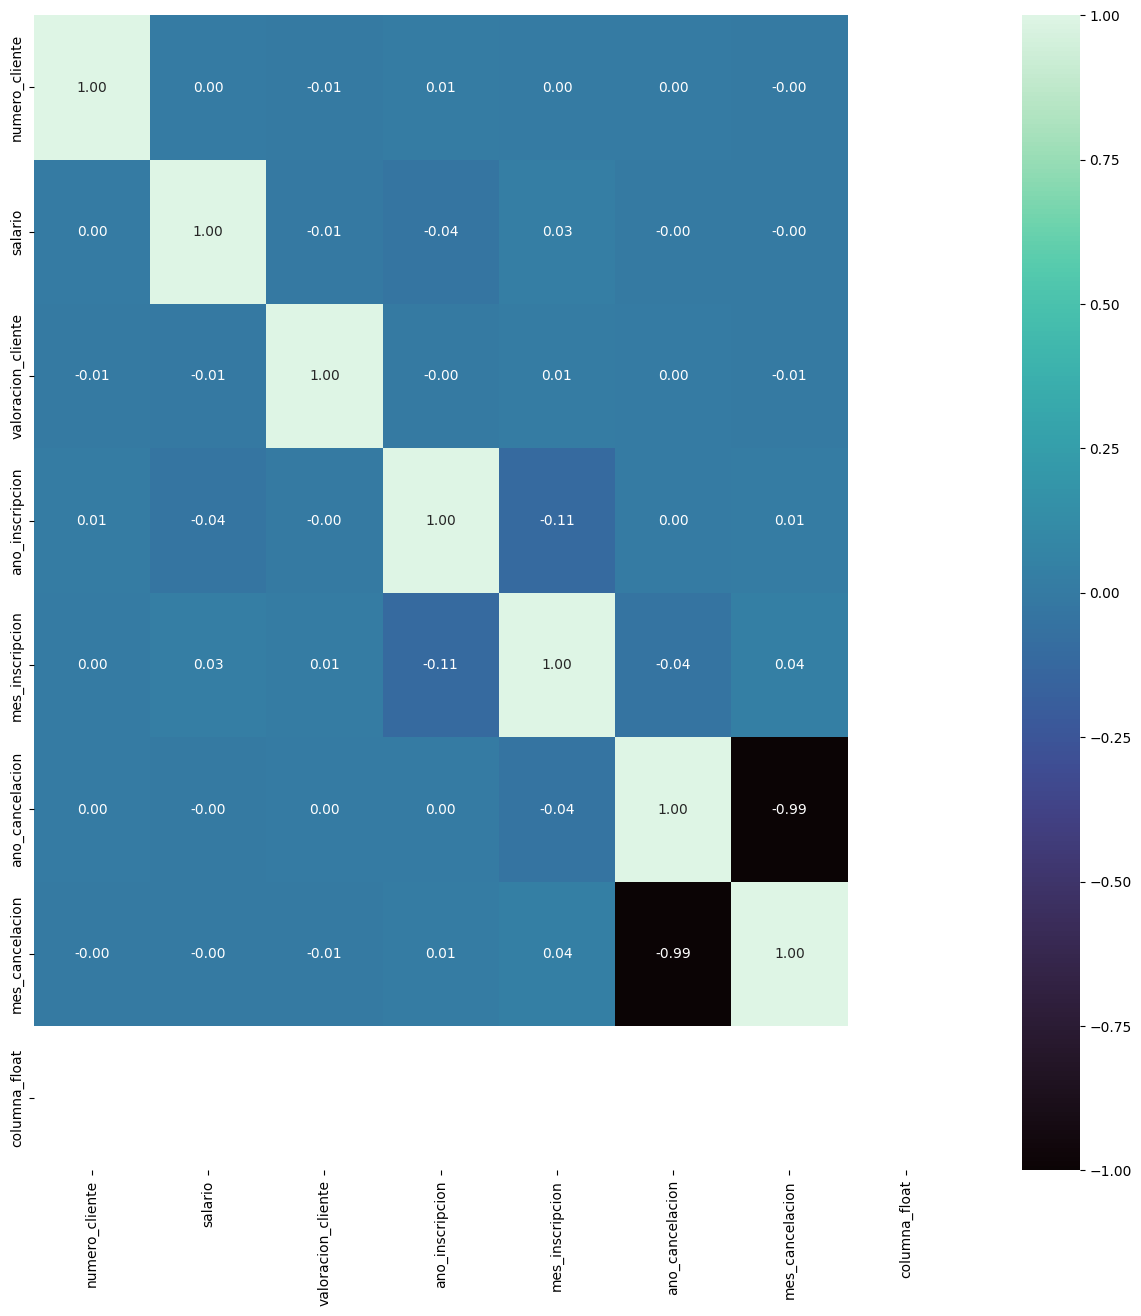

In [93]:
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# convertimos nuestra matriz de correlación a una gráfica
sns.heatmap(df_correlaciones, # sobre que datos queremos hacer el heatmap
            annot = True, # para que nos muestre los valores de cada una de las celdas del heatmap
            fmt = ".2f",  # para que nos redondee a dos decimales
            cmap = "mako", # para establecer el color de la gráfica
            vmax = 1, # para indicar cual es el valor máximo de nuestra escala de colores
            vmin = -1); # para identificar el valor mínimo de nuestra escala de colores

Sigue siendo una tabla bastante grande, vamos a intentar reducirla un poco. Y es que si nos fijamos, tenemos una diagonal de 1, y lo que tenemos por arriba y por debajo de la diagonal es la misma información, es como un espejo. Por lo que vamos a "eliminar" una de las partes, para eso vamos a usar el parámetro `mask` del `heatmap`. 

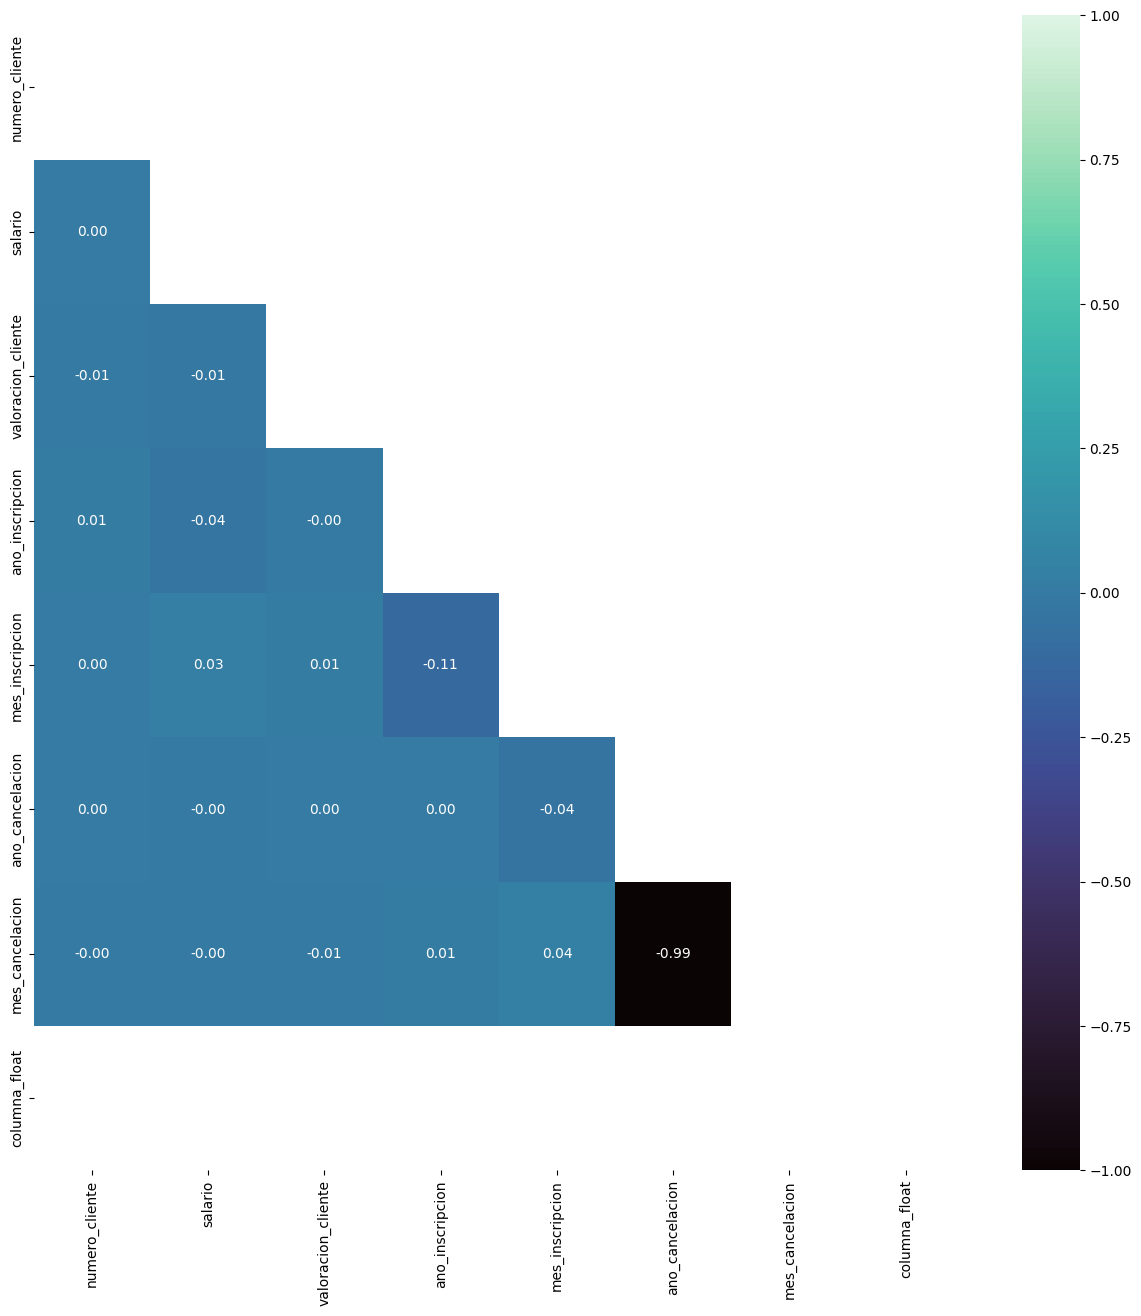

In [94]:
# AHORA YA PODREMOS ENTENDER DE UNA FORMA MÁS AMIGABLE LOS RESULTADOS DE LA MATRIZ DE CORRELACIÓN
# establecemos el tamaño de la gráfica
plt.figure(figsize = (15, 15))

# creamos una matriz booleana de máscara
mask = np.triu(np.ones_like(df_correlaciones, dtype=bool))

# creamos un heatmap con la máscara
sns.heatmap(df_correlaciones, 
            annot = True, 
            fmt = ".2f", 
            cmap = "mako", 
            vmax = 1, 
            vmin = -1, 
            mask = mask); 

In [96]:
# Lo guardamos para trabajar con otro él en otro jupyter
df2.to_csv("Customer Loyalty History_limpio.csv", index=False)

### Ahora uniremos ambos csv

In [98]:
# abrir df1 limpio 
df1_limpio = pd.read_csv("Customer Flight Activity_limpio.csv")
df1_limpio.shape

(405624, 11)

In [100]:
# abrimos df2 limpio
df2_limpio = pd.read_csv("Customer Loyalty History_limpio.csv")
df2_limpio.shape

(16737, 17)

In [101]:
# los mergeamos quedandonos con todas las columnas del df1 y lo unimos al df2 por la columna que tienen en comun
df_unido = df1_limpio.merge(df2_limpio, on="numero_cliente", how="left")

In [102]:
# comprobamos
df_unido.shape

(405624, 27)

Hemos mantenido las filas del df1 para quedarnos con los viajes del cliente y hemos unido sus datos

In [104]:
# Lo guardamos para trabajar con otro él en otro jupyter
df_unido.to_csv("datos_limpio_unidos.csv", index=False)